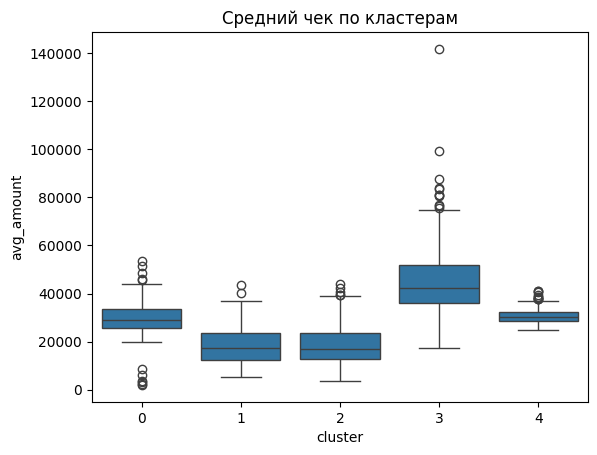

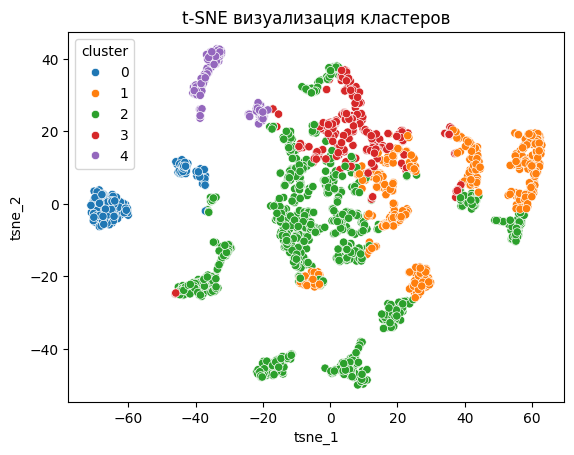

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_parquet("../data/processed/features_with_clusters.parquet")

# Пример: boxplot по среднему чеку на каждый кластер
sns.boxplot(data=df, x="cluster", y="avg_amount")
plt.title("Средний чек по кластерам")
plt.show()

# Пример: t-SNE для 2D-визуализации
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['card_id', 'cluster'])
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10')
plt.title("t-SNE визуализация кластеров")
plt.show()
